# read label

In [2]:
import pandas as pd

## bounding box

In [3]:
bbox_table = pd.read_csv('data/BBox_List_2017.csv')

In [4]:
bbox_table

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


## 4 bbox values

In [5]:
bbox_table['Bbox [x']

0      225.084746
1      686.101695
2      221.830508
3      726.237288
4      660.067797
          ...    
979    198.940451
980    701.838229
981    140.913785
982    175.047118
983    343.438229
Name: Bbox [x, Length: 984, dtype: float64

In [6]:
bbox_table['y']

0      547.019217
1      131.543498
2      317.053115
3      494.951420
4      569.780787
          ...    
979    352.900747
980    572.491858
981    658.962969
982    580.456302
983    446.198524
Name: y, Length: 984, dtype: float64

In [7]:
bbox_table['w']

0       86.779661
1      185.491525
2      155.118644
3      141.016949
4      200.677966
          ...    
979    615.537778
980    103.537778
981    271.928889
982    244.622222
983    120.604444
Name: w, Length: 984, dtype: float64

In [8]:
bbox_table['h]']

0       79.186441
1      313.491525
2      216.949153
3       55.322034
4       78.101695
          ...    
979    323.128889
980     63.715556
981     94.435556
982    103.537778
983     53.475556
Name: h], Length: 984, dtype: float64

## check how many classes

In [9]:
set(bbox_table['Finding Label'])

{'Atelectasis',
 'Cardiomegaly',
 'Effusion',
 'Infiltrate',
 'Mass',
 'Nodule',
 'Pneumonia',
 'Pneumothorax'}

In [10]:
classes = list(set(bbox_table['Finding Label']))
classes

['Atelectasis',
 'Pneumothorax',
 'Infiltrate',
 'Pneumonia',
 'Nodule',
 'Mass',
 'Effusion',
 'Cardiomegaly']

# count dataset size of each classes

In [11]:
for i in classes:
    print(i)
    print(len(bbox_table[bbox_table['Finding Label'] == i].index))
    print()

Atelectasis
180

Pneumothorax
98

Infiltrate
123

Pneumonia
120

Nodule
79

Mass
85

Effusion
153

Cardiomegaly
146



# get only Atelectasis data

In [12]:
bbox_table = bbox_table[bbox_table['Finding Label'] == 'Atelectasis']
print(bbox_table.shape)
bbox_table

(180, 9)


,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


# YOLO LABEL

In [66]:
# yolo classes
with open("data/labels_at/classes.txt", "w") as myfile:
    for i in classes:
        myfile.write('{}\n'.format(i))

<object-class> <x_center> <y_center> <width> <height>

where:
<x_center> <y_center> <width> <height> - float values relative to width and height of image, it can be equal from (0.0 to 1.0]

for example: <x> = <absolute_x> / <image_width> or <height> = <absolute_height> / <image_height>
    

atention: <x_center> <y_center> - are center of rectangle (are not top-left corner)

In [31]:
class_map = {}

for i, cname in enumerate(classes):
    class_map[cname] = i

class_map

{'Nodule': 0,
 'Atelectasis': 1,
 'Pneumothorax': 2,
 'Pneumonia': 3,
 'Cardiomegaly': 4,
 'Infiltrate': 5,
 'Effusion': 6,
 'Mass': 7}

In [33]:
# for Atelectasis only case

class_map = {}
class_map['Atelectasis'] = 0

In [37]:
# create yolo label

image_shape = 1024 # 1024 x 1024

for img_name in bbox_table['Image Index']:
    label = bbox_table[bbox_table['Image Index'] == img_name]
    # object class
    _class = class_map[list(label['Finding Label'])[0]]
    # x center
    # move x to right (+t, )
    # (0.0 to 1.0]
    relative_x = ( list(label['Bbox [x'])[0] + list(label['w'])[0]//2 ) / image_shape
    # y center
    # move y to down (, +t)
    # (0.0 to 1.0]
    relative_y = ( list(label['y'])[0] + list(label['h]'])[0]//2 ) / image_shape
    # width
    # (0.0 to 1.0]
    relative_w = list(label['w'])[0] / image_shape
    # height
    # (0.0 to 1.0]
    relative_h = list(label['h]'])[0] / image_shape
    
    # what yolo label looks like
    print('{}.txt'.format(img_name[:-4]))
    print('{} {} {} {} {}'.format(_class, relative_x, relative_y, relative_w, relative_h))
    print()
    
    # write file
    with open("data/labels_at/{}.txt".format(img_name[:-4]), "a") as myfile:
        myfile.write('{} {} {} {} {}\n'.format(_class, relative_x, relative_y, relative_w, relative_h))
    

00013118_008.txt
0 0.2618015095338984 0.5722843913708701 0.08474576271186436 0.07733050847457626

00014716_007.txt
0 0.7598649364406778 0.2808041976670088 0.18114406779661033 0.30614406779661035

00029817_009.txt
0 0.2918266684322031 0.4150909326844297 0.151483050847458 0.21186440677966115

00014687_001.txt
0 0.777575476694915 0.5097181837437519 0.1377118644067793 0.054025423728813575

00017877_001.txt
0 0.7422537076271182 0.5945124868619238 0.1959745762711865 0.07627118644067793

00003148_004.txt
0 0.6094412076271182 0.5818171743619238 0.05508474576271182 0.17584745762711815

00012515_002.txt
0 0.3223483845338984 0.6505252547183281 0.08156779661016952 0.05508474576271182

00022098_006.txt
0 0.6143571239406778 0.6390547833200224 0.2648305084745762 0.15042372881355956

00014198_000.txt
0 0.7083388506355928 0.5940501487861239 0.09639830508474581 0.1885593220338984

00021007_000.txt
0 0.38711599576271194 0.5067553924301924 0.10275423728813574 0.09957627118644044

00030674_000.txt
0 0.7284

# check how many image has label

In [26]:
# get images with label
import os

has_label = set(os.listdir('data/labels_at/'))

has_label

{'00000072_000.txt',
 '00000147_001.txt',
 '00000149_006.txt',
 '00000181_061.txt',
 '00000211_010.txt',
 '00000457_004.txt',
 '00000468_017.txt',
 '00000468_033.txt',
 '00000583_008.txt',
 '00000643_002.txt',
 '00000744_006.txt',
 '00000808_002.txt',
 '00000830_000.txt',
 '00000865_006.txt',
 '00001153_004.txt',
 '00001170_046.txt',
 '00001320_003.txt',
 '00001673_016.txt',
 '00001836_082.txt',
 '00002350_001.txt',
 '00002856_009.txt',
 '00003148_004.txt',
 '00003440_000.txt',
 '00003787_003.txt',
 '00003945_004.txt',
 '00004296_000.txt',
 '00004968_003.txt',
 '00004968_004.txt',
 '00005089_002.txt',
 '00005089_014.txt',
 '00006621_004.txt',
 '00006851_033.txt',
 '00006851_034.txt',
 '00006948_002.txt',
 '00007120_009.txt',
 '00007124_008.txt',
 '00007557_026.txt',
 '00007676_002.txt',
 '00007710_000.txt',
 '00008005_004.txt',
 '00008554_009.txt',
 '00008716_000.txt',
 '00008814_010.txt',
 '00009256_005.txt',
 '00009437_008.txt',
 '00009619_000.txt',
 '00009669_003.txt',
 '00009779_00

In [15]:
cnt_all = 0
cnt_no_label = 0

for img_name in set(os.listdir('data/images/')):
    if '{}.txt'.format(img_name[:-4]) not in has_label:
        # print(img_name)
        cnt_no_label += 1
    
    cnt_all += 1


In [16]:
cnt_all

112120

In [17]:
cnt_no_label

111940

In [18]:
len(has_label)

181

## show on image

In [13]:
# target image
image_name = bbox_table['Image Index'][100]

In [14]:
# label of the target image
label = bbox_table[bbox_table['Image Index'] == image_name]
label

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
100,00009437_008.png,Atelectasis,752.016931,595.978836,163.62328,78.019048,NaN,NaN,NaN


In [15]:
print(list(label['Bbox [x'])[0])
print(list(label['y'])[0])
print(list(label['w'])[0])
print(list(label['h]'])[0])

752.016931216931
595.978835978836
163.62328042328002
78.0190476190476


In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

In [17]:
img = cv2.imread('data/images/{}'.format(bbox_table['Image Index'][0]))

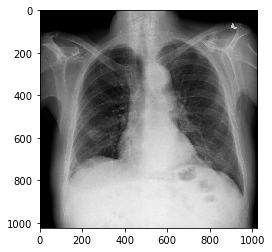

In [18]:
plt.imshow(img)

In [19]:
img.shape

(1024, 1024, 3)

In [20]:
##:                (xy)---------------+
##:                |                  |
##:              height               |
##:                |                  |
##:                +----- width ------+

In [21]:
label_color = ['red', 'blue', 'green', 'orange', 'cyan']

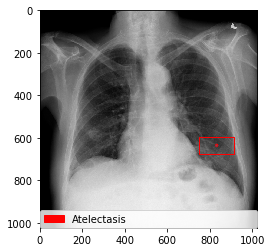

In [22]:
# add label bbox
plt.imshow(img)

ax = plt.gca()

_patches = []

# a image might have many labels
for i in range(len(list(label['y']))):
    rect = patches.Rectangle((list(label['Bbox [x'])[i], list(label['y'])[i]),
                            list(label['w'])[i], list(label['h]'])[i],
                            linewidth=1, edgecolor=label_color[i], fill=False )
    
    # plot center point of bbox
    cent = patches.Circle((list(label['Bbox [x'])[i] + list(label['w'])[0]//2,
                           list(label['y'])[i] + list(label['h]'])[0]//2 ),
                            radius = 5, edgecolor=label_color[i], fill=True )
    
    ax.add_patch(rect)
    ax.add_patch(cent)

    _patches.append(patches.Patch(color=label_color[i], label=list(label['Finding Label'])[i]))
    
plt.legend(handles=_patches, ncol=2, loc='lower left', mode='expand', borderaxespad=0.)

plt.show()

In [ ]:
# according to wiki
# A pulmonary infiltrate is a substance denser than air, such as pus, blood, or protein, which lingers within the parenchyma of the lungs.[1] 
# Pulmonary infiltrates are associated with pneumonia, and tuberculosis.

# train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
os.getcwd()

'/home/jeff/work/med_ai/NIH'

In [27]:
X = ['{}/data/yolo_at/{}png'.format(os.getcwd(),i[:-3]) for i in list(has_label)]
X

['/home/jeff/work/med_ai/NIH/data/yolo_at/00012299_002.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00000865_006.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00021481_014.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00015440_000.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00029464_003.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00000211_010.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00000830_000.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00015300_000.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00030674_000.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00019271_030.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00019271_064.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00018253_059.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00010936_011.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00025228_005.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00016837_002.png',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00010575_002.png',
 '/home/jeff/work/med_ai

In [28]:
y = list(has_label)
y = ['{}/data/yolo_at/{}'.format(os.getcwd(),i) for i in y]
y

['/home/jeff/work/med_ai/NIH/data/yolo_at/00012299_002.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00000865_006.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00021481_014.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00015440_000.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00029464_003.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00000211_010.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00000830_000.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00015300_000.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00030674_000.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00019271_030.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00019271_064.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00018253_059.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00010936_011.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00025228_005.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00016837_002.txt',
 '/home/jeff/work/med_ai/NIH/data/yolo_at/00010575_002.txt',
 '/home/jeff/work/med_ai

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [32]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

162
162
19
19


In [33]:
# split train valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [34]:
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(y_valid))
print(len(X_test))
print(len(y_test))

145
145
17
17
19
19


In [35]:
f = open('train_at.txt', 'w')
for i in X_train:
    f.write('{}\n'.format(i))
    
f.close()

In [36]:
f = open('valid_at.txt', 'w')
for i in X_valid:
    f.write('{}\n'.format(i))
    
f.close()

In [37]:
f = open('test_at.txt', 'w')
for i in X_test:
    f.write('{}\n'.format(i))
    
f.close()